In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [2]:
df = pd.read_csv("../simulation/data/multisin/excitation_multisine.csv")

In [3]:
sel_df =  df[(df.axis == "both") & (df.seal == False)]
optimized_signal =sel_df["fx"].values
t = sel_df["t"].values
frequencies = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69]
optimized_phases = [-0.5949568 ,  0.46064198, -0.8302675 ,  0.38420948,
                   -2.9454226 , -1.2498724 ,  1.106336  ,  0.99835265,
                    1.9724548 , -0.54498994, -2.5631304 ,  1.7362409 ,
                   -0.59033155, -1.150956  ]
ones_matrix = np.ones(shape=(optimized_signal.shape[0], len(frequencies)))
X = ones_matrix * np.array(optimized_phases) +\
      ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
X = np.sin(X)

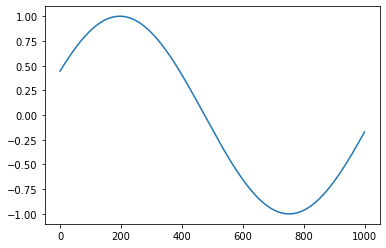

In [4]:
plt.plot(X[:1000, 1])

In [5]:
amplitudes = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ np.array(optimized_signal).reshape((-1, 1))
amplitudes

array([[0.42605196],
       [0.42616357],
       [0.42606566],
       [0.42615273],
       [0.42617767],
       [0.42605708],
       [0.42599541],
       [0.42603924],
       [0.42624204],
       [0.42609203],
       [0.42612405],
       [0.42603869],
       [0.4260853 ],
       [0.42606184]])

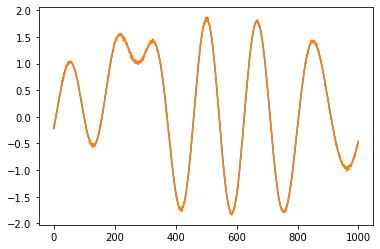

In [6]:
plt.plot((X[:1000] @ amplitudes).flatten())
plt.plot(optimized_signal[:1000])

In [7]:
X =sel_df["x"].values
Y =sel_df["y"].values
Q = sel_df[["x", "y"]].values
t = sel_df["t"].values
frequencies = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69]
optimized_phases = [-0.5949568 ,  0.46064198, -0.8302675 ,  0.38420948,
                   -2.9454226 , -1.2498724 ,  1.106336  ,  0.99835265,
                    1.9724548 , -0.54498994, -2.5631304 ,  1.7362409 ,
                   -0.59033155, -1.150956  ]
ones_matrix = np.ones(shape=(X.shape[0], len(frequencies)))
S = ones_matrix * np.array(optimized_phases) +\
      ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
S = np.concatenate([np.sin(S), np.cos(S)], axis=1)

In [8]:
amplitudes_x = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X).reshape((-1, 1))
amplitudes_y = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(Y).reshape((-1, 1))

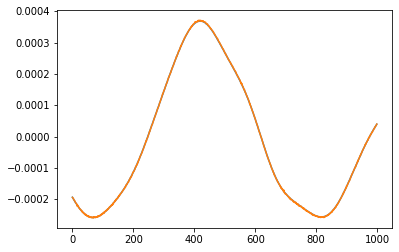

In [9]:
plt.plot((S[:1000] @ amplitudes_x).flatten())
plt.plot(X[:1000])

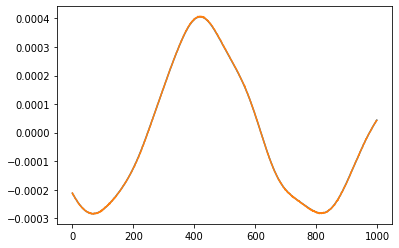

In [10]:
plt.plot((S[:1000] @ amplitudes_y).flatten())
plt.plot(Y[:1000])

In [11]:
amplitudes_y

array([[ 6.80312745e-05],
       [ 1.02840007e-04],
       [-4.14457384e-05],
       [-6.26424480e-05],
       [-2.99609260e-05],
       [-1.80268880e-05],
       [-1.23137642e-05],
       [-8.86566086e-06],
       [-6.82298587e-06],
       [-5.39887422e-06],
       [-4.36717023e-06],
       [-3.56347551e-06],
       [-2.96889460e-06],
       [-2.49370766e-06],
       [-4.53527263e-06],
       [-2.50877851e-05],
       [-2.81065933e-04],
       [-2.05993778e-05],
       [-5.52221482e-06],
       [-2.41602411e-06],
       [-1.33471728e-06],
       [-8.52782514e-07],
       [-5.38555955e-07],
       [-3.62555478e-07],
       [-2.66187010e-07],
       [-1.85763325e-07],
       [-1.26709142e-07],
       [-1.36927055e-08]])

In [12]:
from models.run_model import add_derivatives, linreg_estimate

In [13]:
df_deriv = add_derivatives(sel_df)

In [14]:
estimates = linreg_estimate(df_deriv)
V = np.concatenate([estimates["C"][:, 0], estimates["K"][:, 0]])
K = estimates["K"].transpose()[:, 0]

In [15]:
(S * amplitudes_x.reshape((1, -1)))

array([[-3.46017818e-05,  4.14915145e-05,  2.77573566e-05, ...,
         2.61892840e-08, -9.02236646e-08, -5.76587571e-09],
       [-3.44731722e-05,  4.19636540e-05,  2.75331028e-05, ...,
         3.19844942e-08, -9.25810352e-08, -6.32028307e-09],
       [-3.43443449e-05,  4.24344515e-05,  2.73067187e-05, ...,
         3.77357548e-08, -9.47887191e-08, -6.86281290e-09],
       ...,
       [-3.49862959e-05,  4.00671961e-05,  2.84171625e-05, ...,
         8.61982436e-09, -8.22927199e-08, -4.04190704e-09],
       [-3.48583444e-05,  4.05432704e-05,  2.81994035e-05, ...,
         1.44989174e-08, -8.50753450e-08, -4.62561627e-09],
       [-3.47301728e-05,  4.10180483e-05,  2.79794625e-05, ...,
         2.03580876e-08, -8.77204188e-08, -5.20063269e-09]])

In [16]:
M_x = (S * amplitudes_x.reshape((1, -1))).reshape((-1, 2, 14)).sum(axis=1)
M_y = (S * amplitudes_y.reshape((1, -1))).reshape((-1, 2, 14)).sum(axis=1)


In [17]:
M = np.concatenate([M_y, M_x], axis=1)

In [18]:
np.linalg.inv(M.transpose() @ M) @ M.transpose() @ Q @ K

array([-236042.54899334, -236042.79085674, -236042.2373095 ,
       -236042.54738223, -236042.51605934, -236042.53646317,
       -236042.53536991, -236042.53479599, -236042.53740662,
       -236042.53783937, -236042.53802925, -236042.53817133,
       -236042.53813525, -236042.53860806,  267581.42044903,
        267581.68646901,  267581.07777058,  267581.41875266,
        267581.38421882,  267581.40671659,  267581.40551284,
        267581.4049017 ,  267581.4077726 ,  267581.40825238,
        267581.40846057,  267581.40861769,  267581.40857773,
        267581.40909213])

In [19]:
(np.linalg.inv(M.transpose() @ M) @ M.transpose()).shape

(28, 100000)

In [20]:
Q

array([[-0.00019365, -0.00021185],
       [-0.0001947 , -0.00021613],
       [-0.00019566, -0.00021769],
       ...,
       [-0.00018767, -0.00020655],
       [-0.00018906, -0.00020728],
       [-0.00019101, -0.00021039]])

In [21]:
list(range(5, 70, 4))

[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69]

In [22]:
def get_coefs(sel_df, axis):
    X =sel_df["x"].values
    Y =sel_df["y"].values
    Q = sel_df[["x", "y"]].values
    t = sel_df["t"].values
    
    frequencies = list(range(5, 70, 4))
  
    ones_matrix = np.ones(shape=(X.shape[0], len(frequencies)))
    S = ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
    S = np.concatenate([np.sin(S), np.cos(S)], axis=1)
    
    amplitudes_x = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X).reshape((-1, 1))
    amplitudes_y = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(Y).reshape((-1, 1))
    
    df_deriv = add_derivatives(sel_df)
    estimates = linreg_estimate(df_deriv)
    K = estimates["K"][:, axis]
    print(K)
    
    M_x = (S * amplitudes_x.reshape((1, -1))).reshape((-1, 2, len(frequencies))).sum(axis=1)
    M_y = (S * amplitudes_y.reshape((1, -1))).reshape((-1, 2, len(frequencies))).sum(axis=1)
    M = np.concatenate([M_y, M_x], axis=1)
    return np.linalg.inv(M.transpose() @ M) @ M.transpose() @ Q @ K

In [23]:
c_wo = get_coefs(df[(df.axis == "y") & (df.seal == False)], axis=1)
c_with = get_coefs(df[(df.axis == "y") & (df.seal == True)], axis=1)

[-2.54685198e+00  7.49982968e+03]
[-444.6039459  7903.70141554]


In [24]:
c_with - c_wo

array([ 403.87174009,  403.87174009,  403.87174009,  403.87174009,
        403.87174009,  403.87174009,  403.87174009,  403.87174009,
        403.87174009,  403.87174011,  403.87174009,  403.87174009,
        403.87174009,  403.87174009,  403.87174009,  403.8717401 ,
        403.87174009, -442.05709386, -442.05712849, -442.05709391,
       -442.05709446, -442.05709392, -442.05709388, -442.05709389,
       -442.05709392, -442.05709392, -442.05709005, -442.05709397,
       -442.05709378, -442.05709393, -442.0570939 , -442.05709393,
       -442.05709392, -442.05709565])

In [25]:
def first_derivative(X, frequencies):
    freq_ts = ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
    S = np.concatenate([np.sin(freq_ts), np.cos(freq_ts)], axis=1)
    amplitudes = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X).reshape((-1, 1))
    return S, amplitudes

In [26]:
X =sel_df["x"].values
Y =sel_df["y"].values
Q = sel_df[["x", "y"]].values
t = sel_df["t"].values

frequencies = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69]
optimized_phases = [-0.5949568 ,  0.46064198, -0.8302675 ,  0.38420948,
                   -2.9454226 , -1.2498724 ,  1.106336  ,  0.99835265,
                    1.9724548 , -0.54498994, -2.5631304 ,  1.7362409 ,
                   -0.59033155, -1.150956  ]

ones_matrix = np.ones(shape=(X.shape[0], len(frequencies)))
freq_ts = ones_matrix * np.array(optimized_phases) +\
      ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
S = np.concatenate([np.sin(freq_ts), np.cos(freq_ts)], axis=1)

amplitudes_x = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X).reshape((-1, 1))
amplitudes_y = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(Y).reshape((-1, 1))

In [27]:
S_dot = np.concatenate([np.cos(freq_ts)*2 * np.pi * np.array(frequencies) , 
                       -np.sin(freq_ts)*2 * np.pi * np.array(frequencies)], axis=1)
X_dot = S_dot @ amplitudes_x

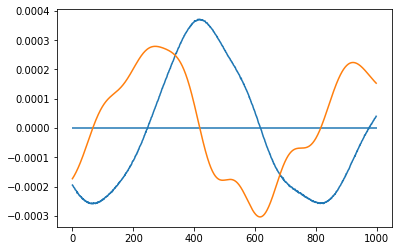

In [28]:
plt.plot(X[1:1000])
plt.plot(X_dot[1:1000]/100)
plt.hlines(0, xmin=0, xmax=1000)

In [29]:
freq_ts.shape

(100000, 14)

In [30]:
from experiments.prepare_dataset import load_amb_sin_data, prepare_df, get_data_multisin

In [31]:
df = get_data_multisin("../amb_other/flat_schroeder_*")

../amb_other/flat_schroeder_fx_5to69Hz_df_4Hz_0RPM.txt


../experiments/prepare_dataset.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["t"] = df["datetime"].apply(lambda x: (x - start_datetime).delta * 1e-9)


../amb_other/flat_schroeder_fy_5to69Hz_df_4Hz_0RPM.txt


In [32]:
c_wo = get_coefs(df[df.axis=="x"], axis=0)

sel_df = df[df.axis=="x"]
axis = 0

[9329.70855466  252.3875513 ]


In [33]:
X =sel_df["x"].values
Y =sel_df["y"].values
Q = sel_df[["x", "y"]].values
t = sel_df["t"].values

frequencies = list(range(5, 70, 4))

ones_matrix = np.ones(shape=(X.shape[0], len(frequencies)))
S = ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
S = np.concatenate([np.sin(S), np.cos(S)], axis=1)

amplitudes_x = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X).reshape((-1, 1))
amplitudes_y = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(Y).reshape((-1, 1))

df_deriv = add_derivatives(sel_df)
estimates = linreg_estimate(df_deriv)
K = estimates["K"][:, axis]
print(K)

M_x = (S * amplitudes_x.reshape((1, -1))).reshape((-1, 2, len(frequencies))).sum(axis=1)
M_y = (S * amplitudes_y.reshape((1, -1))).reshape((-1, 2, len(frequencies))).sum(axis=1)
M = np.concatenate([M_y, M_x], axis=1)
np.linalg.inv(M.transpose() @ M) @ M.transpose() @ Q @ K

[9329.70855466  252.3875513 ]


array([ 252.38755152,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 ,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 ,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 ,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 , 9329.70855468, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466])

In [34]:
S_dot = np.concatenate([np.cos(freq_ts)*2 * np.pi * np.array(frequencies) , 
                       -np.sin(freq_ts)*2 * np.pi * np.array(frequencies)], axis=1)
X_dot = S_dot @ amplitudes_x

ValueError: operands could not be broadcast together with shapes (100000,14) (17,) 

In [ ]:
np.array([[1,2,3,4],
          [4,5,6,7]]).reshape((-1, 2, 2))

In [ ]:
amplitudes_x/np.mean(amplitudes_x)

In [37]:
M_x.shape

(82160, 17)

In [38]:
np.linalg.inv(M.transpose() @ M) @ M.transpose() @ Q @ K

array([ 252.38755152,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 ,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 ,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 ,  252.3875513 ,  252.3875513 ,  252.3875513 ,
        252.3875513 , 9329.70855468, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466, 9329.70855466, 9329.70855466,
       9329.70855466, 9329.70855466])

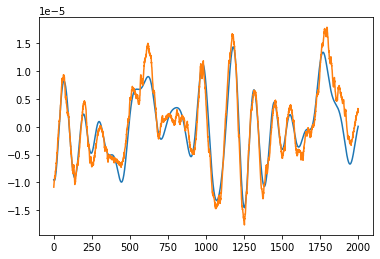

In [39]:
plt.plot(M_y.sum(axis=1)[:2000])
plt.plot(Y[:2000])

In [40]:
A = np.linalg.inv(M.transpose() @ M) @ M.transpose()

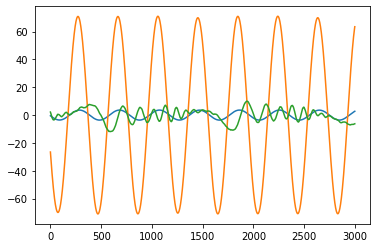

In [41]:
plt.plot(A[19, :3000])
plt.plot(A[2, :3000])
plt.plot(Q[:3000, 0]*1e5)

In [42]:
(Q[:30000, 0]*A[17, :30000]).sum()

0.4534619874192063

In [43]:
Q[:, 0].sum()

0.07480601971519053

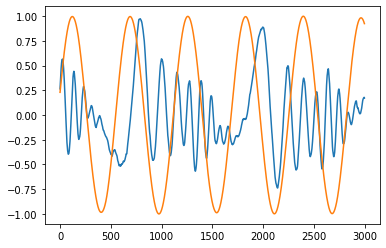

In [44]:
plt.plot(Q[-3000:, 0]/np.max(Q[:, 0]))
plt.plot(A[18, -3000:]/np.max(A[18]))

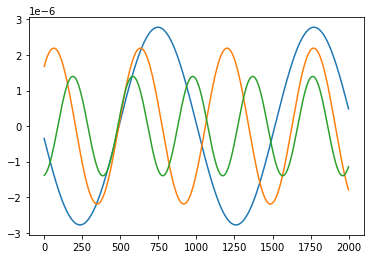

In [45]:
plt.plot(M[:2000, :3])
plt.show()

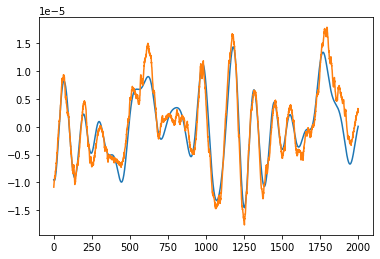

In [46]:
plt.plot(M[:2000, :17].sum(axis=1))
plt.plot(Q[:2000, 1])

In [47]:
A.shape

(34, 82160)

In [48]:
Q.shape

(82160, 2)

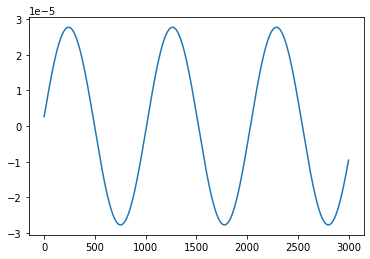

In [49]:
plt.plot(M[:3000, 17])

In [50]:
np.linalg.inv(S.transpose() @ S) @ S.transpose() @ Q

array([[ 2.75590147e-05, -2.75757915e-06],
       [-1.18461176e-05,  1.40959236e-06],
       [-1.03538553e-05,  1.90792572e-07],
       [ 1.31749523e-05, -7.65509434e-07],
       [-1.93625070e-05,  3.54584373e-07],
       [ 1.40177556e-05, -3.82370849e-06],
       [-3.64489554e-06, -1.35196482e-06],
       [-5.74636706e-06,  1.85979425e-06],
       [ 1.48193668e-05,  4.26402917e-07],
       [ 4.12003011e-06, -6.84838272e-08],
       [-9.16968179e-06, -9.50382951e-07],
       [-1.11386997e-05, -2.98487833e-07],
       [-7.74837288e-06,  2.90255809e-07],
       [-5.29311619e-06,  3.16246798e-07],
       [-3.89275339e-06,  1.14875910e-07],
       [-2.78186957e-06,  1.04959873e-07],
       [-4.78044441e-07, -2.48305383e-08],
       [ 2.65404330e-06, -3.49781454e-07],
       [-2.57650861e-05,  1.67825361e-06],
       [ 2.54863259e-05, -1.38347272e-06],
       [-1.52648327e-05,  3.40305874e-06],
       [ 9.40831065e-06,  1.15516175e-06],
       [-1.55177107e-05, -3.81267994e-07],
       [ 1.

In [51]:
X =sel_df["x"].values.reshape((-1, 1))
Y =sel_df["y"].values.reshape((-1, 1))
F = sel_df[["fx", "fy"]].values.reshape((-1, 2))
Q = sel_df[["x", "y"]].values.reshape((-1, 1))
t = sel_df["t"].values.reshape((-1, 1))

def fit_sin(X, frequencies):
    freq_ts = ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
    S = np.concatenate([np.sin(freq_ts), np.cos(freq_ts)], axis=1)
    amplitudes = np.linalg.inv(S.transpose() @ S) @ S.transpose() @ np.array(X)
    
    #V = ( S * amplitudes ).reshape((-1, 2, len(frequencies))).sum(axis=1)
    return S, amplitudes

def calc_basis_matrix(S, amplitudes, index=None):
    num_frequencies = S.shape[1]//2
    V = ( S * amplitudes.reshape((1, -1)) ).reshape((-1, 2, num_frequencies))
    if index:
        return V[:, index:index+1]
    
    return V.sum(axis=1)

def first_derivative_basis(frequencies):
    freq_ts = ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
    S = np.concatenate([np.cos(freq_ts)*2 * np.pi * np.array(frequencies) , 
                       -np.sin(freq_ts)*2 * np.pi * np.array(frequencies)], axis=1)
    return S

def second_derivative_basis(frequencies):
    freq_ts = ones_matrix * 2 * np.pi * np.array(frequencies) * np.array(t).reshape((-1, 1))
    S = np.concatenate([-np.sin(freq_ts) * (2 * np.pi * np.array(frequencies))**2 , 
                       -np.cos(freq_ts) * (2 * np.pi * np.array(frequencies))**2], axis=1)
    
    return S
    
S, amplitudes_x = fit_sin(X, frequencies)
_, amplitudes_y = fit_sin(Y, frequencies)
_, amplitudes_f = fit_sin(F, frequencies)
S_dot = first_derivative_basis(frequencies)
S_dot2 = second_derivative_basis(frequencies)

In [52]:
X_ = calc_basis_matrix(S, amplitudes_x).shape

In [53]:
A = np.concatenate([S_dot2 @ amplitudes_x, S_dot2 @ amplitudes_y], axis=1)

In [54]:
F_ = S @ amplitudes_f - A

In [55]:
X_ = np.concatenate([calc_basis_matrix(S_dot, amplitudes_x)[:, 16:17], calc_basis_matrix(S_dot, amplitudes_y)[:, 16:17],
                     calc_basis_matrix(S, amplitudes_x)[:, 16:17], calc_basis_matrix(S, amplitudes_y)[:, 16:17]], axis=1)

In [56]:
F_.shape

(82160, 2)

In [57]:
X_

array([[-2.07251285e-04, -1.07650262e-05,  2.47717862e-06,
        -6.65975944e-08],
       [-2.97195471e-04, -8.28858045e-06,  2.42796575e-06,
        -6.84564283e-08],
       [-3.85460656e-04, -5.73980612e-06,  2.36102516e-06,
        -6.98320380e-08],
       ...,
       [-1.07952091e-03,  2.33862608e-05,  4.05908676e-07,
        -4.62816567e-08],
       [-1.09052498e-03,  2.49970144e-05,  1.94203097e-07,
        -4.15614758e-08],
       [-1.09373600e-03,  2.64360856e-05, -1.99833726e-08,
        -3.65179969e-08]])

In [ ]:
A_ = A[:, 0]
C = np.linalg.inv(X_.transpose() @ X_) @ X_.transpose() @ (calc_basis_matrix(S, amplitudes_f[:, 0])[:, 16:17] - A_)

In [2]:
X

NameError: name 'X' is not defined

In [ ]:
calc_basis_matrix(S, amplitudes_f[:, 0])[:, 16:17].shape

In [142]:
S @ amplitudes_f

array([[-1.6152514 ,  0.38949838],
       [-1.46729104,  0.39430176],
       [-1.31240491,  0.39811902],
       ...,
       [-0.53430794,  0.10149734],
       [-0.51076306,  0.10561548],
       [-0.48379847,  0.1093641 ]])

In [154]:
S.shape
amplitudes_f.shape

(34, 2)

In [141]:
calc_basis_matrix(S, amplitudes_f.transpose())[:, 16:17]

ValueError: operands could not be broadcast together with shapes (82160,34) (1,68) 

In [131]:
C

array([], shape=(4, 0), dtype=float64)

In [129]:
(np.linalg.inv(X_.transpose() @ X_) @ X_.transpose()).shape

(4, 82160)

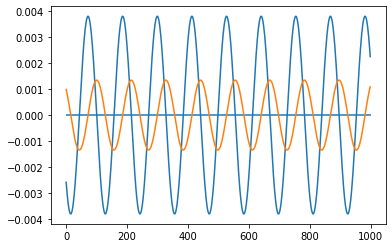

In [118]:
plt.plot(calc_basis_matrix(S_dot, amplitudes_x)[:1000, 10])
plt.plot(calc_basis_matrix(S, amplitudes_x)[:1000, 10]*1e2)
plt.hlines(0, xmin=0, xmax=1000)

In [78]:
S_

NameError: name 'S_' is not defined

In [83]:
np.array([[1,2,3,4,5, 6],
          [6,7,8,9,10, 11]]).reshape((-1, 2, 3)).sum(axis=1)

array([[ 5,  7,  9],
       [15, 17, 19]])